## Declaration of Authorship {.unnumbered .unlisted}

We, \[DeskB\], confirm that the work presented in this assessment is our own. Where information has been derived from other sources, we confirm that this has been indicated in the work. Where a Large Language Model such as ChatGPT has been used we confirm that we have made its contribution to the final submission clear.

Date: 11th December 2023

Student Numbers: 20017359 23032922 23081403 23103585 23130397

## Brief Group Reflection

| What Went Well | What Was Challenging |
|----------------|----------------------|
| A              | B                    |
| C              | D                    |

## Priorities for Feedback

Are there any areas on which you would appreciate more detailed feedback if we're able to offer it?



```{=html}
<style type="text/css">
.duedate {
  border: dotted 2px red; 
  background-color: rgb(255, 235, 235);
  height: 50px;
  line-height: 50px;
  margin-left: 40px;
  margin-right: 40px
  margin-top: 10px;
  margin-bottom: 10px;
  color: rgb(150,100,100);
  text-align: center;
}
</style>
```

{{< pagebreak >}}





# Response to Questions


**Import all packages**

In [19]:
import os
import spacy

import pandas as pd
import numpy as np
import geopandas as gpd
import re
import math
import matplotlib.pyplot as plt
from shapely.geometry import Point


from sklearn.preprocessing import OneHotEncoder # We don't use this but I point out where you *could*
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

from nltk import ngrams, FreqDist

lemmatizer = WordNetLemmatizer()
tokenizer = ToktokTokenizer()

import string
import unicodedata
from bs4 import BeautifulSoup
from gensim.models import KeyedVectors
import gensim
from wordcloud import WordCloud, STOPWORDS

# Import everthing from textual/__init__.py
# Including bunch of tools and functions we could use for NLP 
from textual import *

In [20]:
# Some Configuration allowing us to output Markdown (like this cell) instead of plain text
from IPython.display import display_markdown

def as_markdown(head='', body='Some body text'):
    if head != '':
        display_markdown(f"##### {head}\n\n>{body}\n", raw=True)
    else:
        display_markdown(f">{body}\n", raw=True)

as_markdown('Result!', "Here's my output...")

##### Result!

>Here's my output...


**Loading the Data**

In [21]:
# Download and read the csv file remotely from url
host = 'http://data.insideairbnb.com'
path = 'united-kingdom/england/london/2023-09-06/data'
file = 'listings.csv.gz'
url  = f'{host}/{path}/{file}'

# Save csv file
if os.path.exists(file):
  Airbnb_Listing = pd.read_csv(file, compression='gzip', low_memory=False)
else: 
  Airbnb_Listing = pd.read_csv(url, compression='gzip', low_memory=False)
  Airbnb_Listing.to_csv(file)

# Download and read the gpkg file remotel from url
host = 'https://data.london.gov.uk'
path = 'download/london_boroughs/9502cdec-5df0-46e3-8aa1-2b5c5233a31f'
file = 'London_Boroughs.gpkg'
url  = f'{host}/{path}/{file}'

# Save gkpg file
if os.path.exists(file):
  London_boroughs = gpd.read_file(file, compression='gzip', low_memory=False)
else: 
  London_boroughs = gpd.read_file(url, compression='gzip', low_memory=False)
  London_boroughs.to_file(file, driver='GPKG')


## 1. Who collected the data? ( 2 points; Answer due Week 7 )

::: 1.[\*listings.csv](http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz) : This dataset was created by automatically scraping public information from Airbnb's Website. Murray Cox was one of the main founder and technicians of this mission driven project that aims to provide data and advocacy about Airbnb's impact on residential communities. [\[1\]]((http://insideairbnb.com/about))

2.[\*London_Boroughs.gpkg](https://data.london.gov.uk/download/london_boroughs/9502cdec-5df0-46e3-8aa1-2b5c5233a31f/London_Boroughs.gpkg) and [London-wards-2018](https://data.london.gov.uk/download/statistical-gis-boundary-files-london/08d31995-dd27-423c-a987-57fe8e952990/London-wards-2018.zip) : This dataset is an extract from [Ordnance Survey](https://www.ordnancesurvey.co.uk/) Boundary-Line product which is a specialist 1:10 000 scale boundaries dataset.

:::

An inline citation: As discussed on @insideairbnb, there are many...

A parenthetical citation: There are many ways to research Airbnb [see, for example, @insideairbnb]...

## 2. Why did they collect it? ( 4 points; Answer due Week 7 )

:::

1.[\*listings.csv](http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz) : Inside Airbnb is a mission driven project that provides data and advocacy about Airbnb's impact on residential communities. We work towards a vision where communities are empowered with data and information to understand, decide and control the role of renting residential homes to tourists.

2.[\*London_Boroughs.gpkg](https://data.london.gov.uk/download/london_boroughs/9502cdec-5df0-46e3-8aa1-2b5c5233a31f/London_Boroughs.gpkg) : With a long history and evolving from . The Ordnance Survey aims to help governments make smarter decisions that ensure our safety and security, they also show businesses how to gain a location data edge and we help everyone experience the benefits of the world outside. Under the [Public Sector Geospatial Agreement](https://www.ordnancesurvey.co.uk/customers/public-sector/public-sector-geospatial-agreement) (PSGA), Ordnance Survey (OS) provides Great Britain' national mapping services. OS creates, maintains and provides access to consistent, definitive and authoritative location data of Great Britain, aiming to help organisations to maximise the use, value and benefit of the data for the national interest and the public good. :::


**Size of Data**

In [22]:
print(f"Data frame is {Airbnb_Listing.shape[0]:,} x {Airbnb_Listing.shape[1]:,}")
#print(Airbnb_Listing.columns)

Data frame is 87,946 x 75


## 3. How was the data collected? ( 5 points; Answer due Week 8 )

::: 1.[\*listings.csv](http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/data/listings.csv.gz) : Inside Airbnb collects its data primarily by scraping information from the Airbnb website. This process involves the following steps:

**i.Web Scraping**: Inside Airbnb uses automated scripts to systematically browse and extract data from Airbnb's listings. These scripts navigate the website just like a human user would, but they do it much faster and on a larger scale.

**ii.Data Extraction**: Information about each listing, such as location, price, availability, number of bedrooms, reviews, and host details, is extracted and compiled.

**iii.Data Aggregation**: The collected data is then aggregated into a database. This database is organized to make it easier to analyze trends, patterns, and insights related to Airbnb's offerings in various cities and regions.

**iv.Regular Updates**: The scraping process is repeated periodically to keep the database current, capturing new listings and updates to existing ones.

**v.Public Accessibility**: The aggregated data is often made available to the public through the Inside Airbnb website, enabling researchers, policymakers, and the general public to analyze Airbnb's impact on housing markets and communities. It's important to note that web scraping practices, like those used by Inside Airbnb, may face legal and ethical considerations depending on the website's terms of service and regional laws regarding data privacy and usage.

2.[\*London_Boroughs.gpkg](https://data.london.gov.uk/download/london_boroughs/9502cdec-5df0-46e3-8aa1-2b5c5233a31f/London_Boroughs.gpkg) : "Boundary-Line for England and Wales was initially digitised from Ordnance Survey's boundary record sheets at 1:10 000 scale (or, in some cases, at larger scales). The Government Statistical Service (GSS) codes are supplied by the Office for National Statistics and General Register Office for Scotland(GROS). GIS software provides the functionality to store, manage and manipulate this digital map data. The properties of the data make it suitable as a key base for users wishing to develop applications. BoundaryLine is also suitable for use within other digital mapping systems. It's coordinated on the National Grid which allows for the easy superimposition of other data. :::


In [23]:
#print(Airbnb_Listing.info())

## 4. How does the method of collection impact the completeness and/or accuracy of its representation of the process it seeks to study, and what wider issues does this raise?

::: duedate
( 11 points; Answer due Week 9 )
:::

In [24]:
# Check NAs 检查缺失值（缺失值会如何影响
print(Airbnb_Listing['bathrooms'].isna().sum())


87946


## 5. What ethical considerations does the use of this data raise?

::: duedate
( 18 points; Answer due {{< var assess.group-date >}} )
:::

## 6. With reference to the data (*i.e.* using numbers, figures, maps, and descriptive statistics), what does an analysis of Hosts and Listing types suggest about the nature of Airbnb lets in London?

::: duedate
( 15 points; Answer due {{< var assess.group-date >}} )
:::

**数据基础处理**

In [25]:
%%capture --no-stdout
# Prepare for necessary nltk packages
nltk.download('wordnet') # <-- These are done in a supporting tool, but in your own
nltk.download('averaged_perceptron_tagger') # application you'd need to import them
nltk.download('stopwords')
stopword_list = set(stopwords.words('english'))
print("nltk.download successful")

nltk.download successful


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SBH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SBH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SBH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**选出有用的columns**

In [26]:
Airbnb_Listing.columns
remained_columns = ['id','description','neighbourhood_cleansed','latitude','longitude',
                    'room_type','amenities','price','number_of_reviews',
                    'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 
                    'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value',
                    'reviews_per_month']
Airbnb_Listing = Airbnb_Listing[remained_columns]


In [27]:
# import relating operating tools to normalise 'description' and 'amenities' from Jon Reades codes

import urllib.request
host  = 'https://orca.casa.ucl.ac.uk'
turl  = f'{host}/~jreades/__textual__.py'
tdirs = os.path.join('textual')
tpath = os.path.join(tdirs,'__init__.py')

if not os.path.exists(tpath):
    os.makedirs(tdirs, exist_ok=True)
    urllib.request.urlretrieve(turl, tpath)

In [28]:
# This allows us to edit and reload the library
%load_ext autoreload
%autoreload 2

In [ ]:
# Drop NAs of columns ['description','amenities']
Airbnb_Listing = Airbnb_Listing.dropna(subset=['description','amenities'])
print(f"Now gdf has {Airbnb_Listing.shape[0]:,} rows.")

**Trying to normalise ['description','amenities']**

codes below should be operated only once, run it again only if updating needed

In [30]:
"""

%%time 
# I get about 21 minutes 
Airbnb_Listing['description_norm'] = Airbnb_Listing['description'].apply(normalise_document, remove_digits=True)
"""

c:\Users\SBH\OneDrive - University College London\#CASA0013__FoundationsOfSpatialDataScience\Groupwork_DeskB\textual\__init__.py:606: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(doc, "html.parser")


CPU times: total: 9min 10s
Wall time: 9min 22s


In [31]:
"""

%%time 
# Codes below should be operated only once, run it again only if undating needed

# I get about 21 minutes 
Airbnb_Listing['amenities_norm'] = Airbnb_Listing['amenities'].apply(normalise_document, remove_digits=True)
"""

c:\Users\SBH\OneDrive - University College London\#CASA0013__FoundationsOfSpatialDataScience\Groupwork_DeskB\textual\__init__.py:606: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(doc, "html.parser")


CPU times: total: 5min 4s
Wall time: 5min 9s


In [32]:
# Codes below should be operated only once, run it again only if undating needed
# Airbnb_Listing.to_csv('./Data/Airbnb_Listing_norm.csv', index=True)


**Pre-Processing finished**

**Read the new csvfile**

In [2]:
import pandas as pd
#Read the normed csv
Airbnb_Listing = pd.read_csv("./Data/Airbnb_Listing_norm.csv")



In [18]:
# Select the Corpus
corpus = gdf_listing['description_norm'].fillna(' ').values

sentences = [nltk.sent_tokenize(text) for text in corpus]
words     = [[nltk.tokenize.word_tokenize(sentence) 
                  for sentence in nltk.sent_tokenize(text)] 
                  for text in corpus]


print(f"Sentences 0: {sentences[0]}")
print()
print(f"Words 0: {words[0]}")

Sentences 0: ['space everyone  room twin people wish travel london england home rent.i live quiet leafy suburb southwest london minute waterloo station train  also several great connection  victoria  waterloo chelsea .', 'across road house also public tennis court everyone free several playing field  type sport play .', 'several restaurant nearby serve variety food  everything could wish  plus several never stick .', 'experience host really enjoy meet people .', 'irish live london year interested drop line .']

Words 0: [['space', 'everyone', 'room', 'twin', 'people', 'wish', 'travel', 'london', 'england', 'home', 'rent.i', 'live', 'quiet', 'leafy', 'suburb', 'southwest', 'london', 'minute', 'waterloo', 'station', 'train', 'also', 'several', 'great', 'connection', 'victoria', 'waterloo', 'chelsea', '.'], ['across', 'road', 'house', 'also', 'public', 'tennis', 'court', 'everyone', 'free', 'several', 'playing', 'field', 'type', 'sport', 'play', '.'], ['several', 'restaurant', 'nearby', '

**WORD COULDS**

(-0.5, 399.5, 199.5, -0.5)

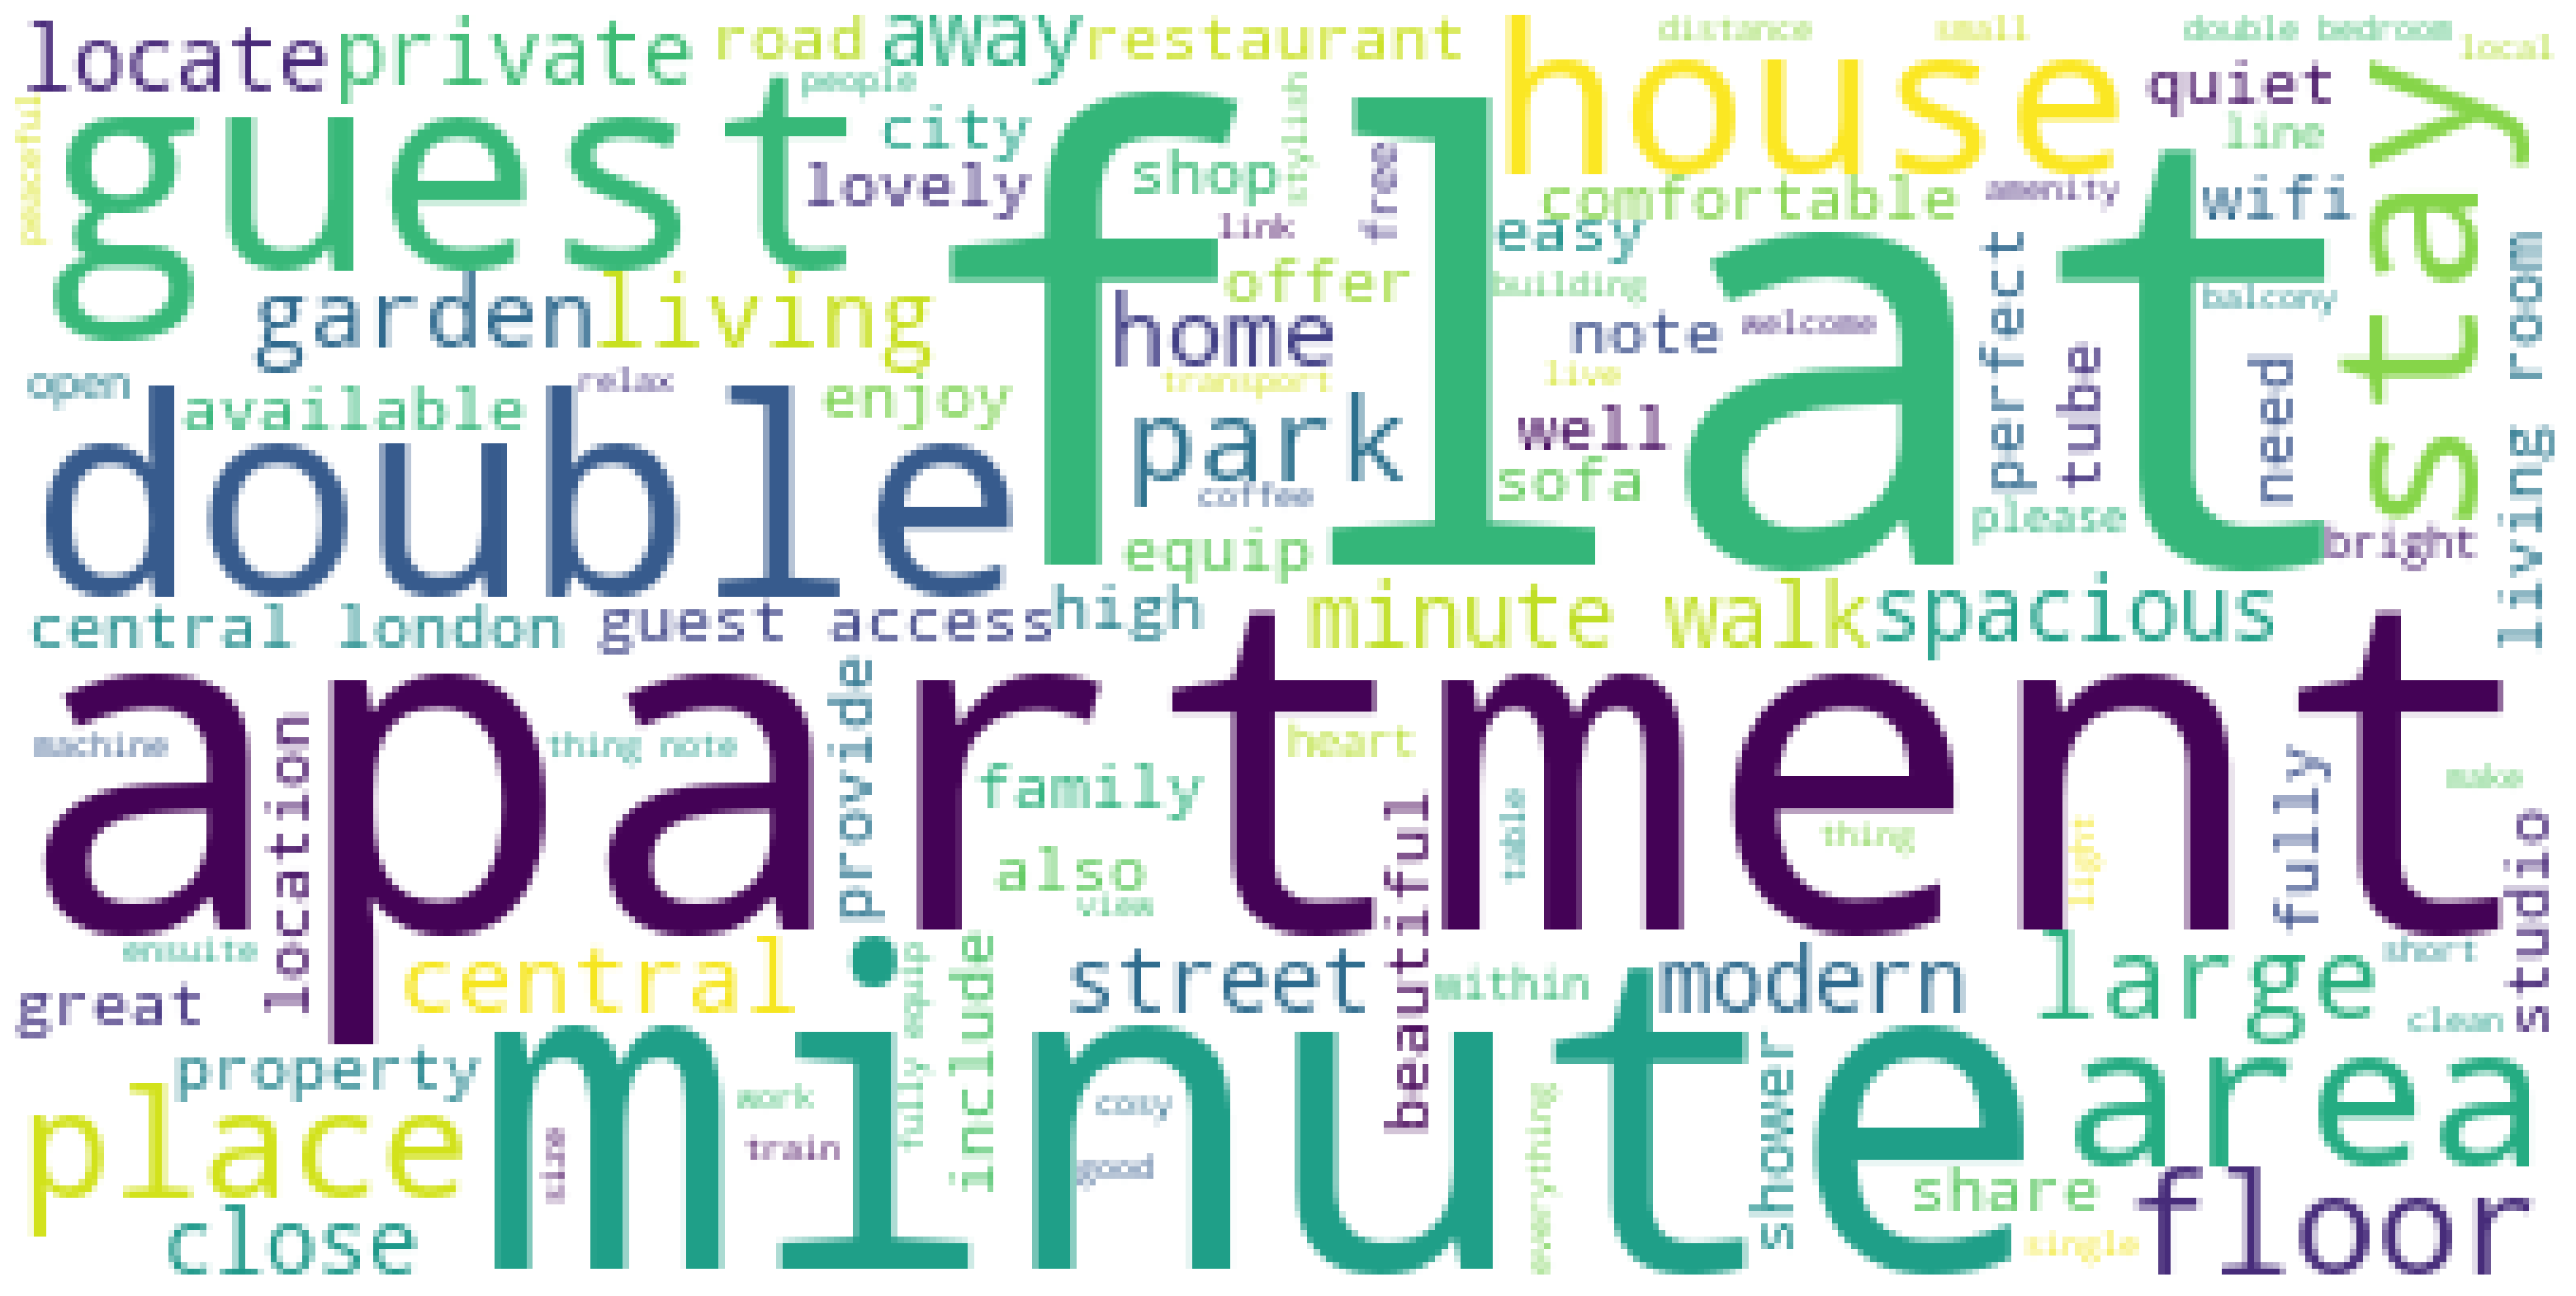

In [20]:
tfidf.sum().sort_values(ascending=False)



# Word Clouds for TF/IDF Weighting
tfidf.sum().sort_values(ascending=False)

plt.figure(figsize=(40, 40))
Cloud = WordCloud(
    background_color="white", 
    max_words=100).generate_from_frequencies(tfidf.sum())
plt.imshow(Cloud) 
plt.axis("off")

**Latent Dirchlet Allocation**

使用RF-IDF模型进行向量化

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

dtm = vectorizer.fit_transform(df['cleaned_description'])

In [ ]:
# Fit and Transform
tfvectorizer = TfidfVectorizer(use_idf=True, ngram_range=(1,3), 
                               max_df=0.4, min_df=0.005) # modify these parameter to improve the model
tftcorpus = tfvectorizer.fit_transform(corpus) # TF-transformed corpus

# Single Document
doc_df = pd.DataFrame(tftcorpus[0].T.todense(), index=tfvectorizer.get_feature_names_out(), columns=["Weights"])
doc_df.sort_values('Weights', ascending=False).head(10)

# Transformed corpus
tfidf = pd.DataFrame(data=tftcorpus.toarray(),
                        columns=tfvectorizer.get_feature_names_out())
print(f"TF/IDF data frame has {tfidf.shape[0]:,} rows and {tfidf.shape[1]:,} columns.")
tfidf.head(20)

In [ ]:
# Using the Gensim library
vectorizer = CountVectorizer(ngram_range=(1,2)) # Notice change to ngram range (try 1,1 and 1,2 for other options)

构建和训练LDA模型

接着，构建LDA模型并用预处理后的数据进行训练。

In [ ]:
# 确定n_components参数

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import Sparse2Corpus
import numpy as np

# 准备Gensim所需的数据结构
texts = [doc.split() for doc in df['cleaned_description']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# 转换成Gensim格式的稀疏向量
gensim_corpus = Sparse2Corpus(dtm, documents_columns=False)

# 测试不同的主题数
coherence_values = []
for n_topics in range(1, 11):  # 假设测试1到10个主题
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)
    cm = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, corpus=gensim_corpus, coherence='u_mass')
    coherence_values.append(cm.get_coherence())

# 选择最佳主题数
optimal_topics = np.argmax(coherence_values) + 1  # 加1因为索引从0开始
print(f"Optimal number of topics: {optimal_topics}")


In [ ]:
# 设置LDA模型
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

查看主题和关键词

查看模型找出的主题和每个主题的关键词。

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names(), no_top_words)


将主题分配给文档

对每个文档（房源描述）分配一个主题。

In [ ]:
topic_values = lda.transform(dtm)
df['Topic'] = topic_values.argmax(axis=1)

分析和可视化

分析得到的主题，并根据需要进行可视化。

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 示例：主题分布的柱状图
sns.countplot(df['Topic'])
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.show()


In [ ]:
"""
# Calculating the topics
vectorizer.fit(corpus) 
tcorpus = vectorizer.transform(corpus) # tcorpus for transformed corpus

LDA = LatentDirichletAllocation(n_components=3, random_state=42) # Might want to experiment with n_components too
LDA.fit(tcorpus)

first_topic = LDA.components_[0]
top_words = first_topic.argsort()[-25:]

for i in top_words:
    print(vectorizer.get_feature_names_out()[i])


for i,topic in enumerate(LDA.components_):
    as_markdown(f'Top 10 words for topic #{i}', ', '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-25:]]))

# Maximize likelihood topic
topic_values = LDA.transform(tcorpus)
topic_values.shape

pd.options.display.max_colwidth=20
gdf_listing['Topic'] = topic_values.argmax(axis=1)
gdf_listing.head()

pd.options.display.max_colwidth=75
gdf_listing[gdf_listing.Topic==1].description_norm.head(10)

vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english', analyzer='word', max_df=0.7, min_df=0.05)
topic_corpus = vectorizer.fit_transform(gdf_listing[gdf_listing.Topic==1].description.values) # tcorpus for transformed corpus

topicdf = pd.DataFrame(data=topic_corpus.toarray(),
                        columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(12, 12))
Cloud = WordCloud(background_color="white", max_words=75).generate_from_frequencies(topicdf.sum())
plt.imshow(Cloud) 
plt.axis("off")
"""

**Word 2 Vec**

In [28]:
from gensim.models.word2vec import Word2Vec


dims = 100
print(f"You've chosen {dims} dimensions.")

window = 3
print(f"You've chosen a window of size {window}.")

min_v_freq  = 0.005 # Don't keep words appearing less than 0.5% frequency
min_v_count = math.ceil(min_v_freq * gdf_listing.shape[0])
print(f"With a minimum frequency of {min_v_freq} and {gdf_listing.shape[0]:,} documents, minimum vocab frequency is {min_v_count:,}.")



You've chosen 100 dimensions.
You've chosen a window of size 3.
With a minimum frequency of 0.005 and 86,679 documents, minimum vocab frequency is 434.


In [30]:
gdf_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [31]:
%%time 

corpus      = gdf_listing.description_norm.fillna(' ').values
#corpus_sent = [nltk.sent_tokenize(text) for text in corpus] # <-- with more formal writing this would work well
corpus_sent = [d.replace('.',' ').split(' ') for d in corpus] # <-- deals better with many short sentences though context may end up... weird
model       = Word2Vec(sentences=corpus_sent, vector_size=dims, window=window, epochs=200, 
                 min_count=min_v_count, seed=42, workers=1)

model.save(f"word2vec-d{dims}-w{window}.model") # <-- You can then Word2Vec.load(...) which is useful with large corpora

CPU times: total: 10min 48s
Wall time: 25min 48s


In [ ]:
pd.set_option('display.max_colwidth',150)

df = fcounts[1] # <-- copy out only the unigrams as we haven't trained anything else

n     = 14 # number of words
topn  = 7  # number of most similar words

selected_words = df[df['Ngram Size 1'] > 5].reset_index().level_0.sample(n, random_state=42).tolist()

words = []
v1    = []
v2    = []
v3    = []
sims  = []

for w in selected_words:
    try: 
        vector = model.wv[w]  # get numpy vector of a word
        #print(f"Word vector for '{w}' starts: {vector[:5]}...")
    
        sim = model.wv.most_similar(w, topn=topn)
        #print(f"Similar words to '{w}' include: {sim}.")
    
        words.append(w)
        v1.append(vector[0])
        v2.append(vector[1])
        v3.append(vector[2])
        sims.append(", ".join([x[0] for x in sim]))
    except KeyError:
        print(f"Didn't find {w} in model. Can happen with low-frequency terms.")
    
vecs = pd.DataFrame({
    'Term':words,
    'V1':v1, 
    'V2':v2, 
    'V3':v3,
    f'Top {topn} Similar':sims
})

vecs

In [ ]:
print(model.wv.index_to_key) # <-- the full vocabulary that has been trained

**加入地理信息元素绘图**

In [ ]:
%%capture --no-stdout
# Transfer pandas dataframe (Airbnb_listing.csv) to geopandas geodataframe
# By using the coordinates ()
from shapely.geometry import Point

# Create geometry column
geometry = [Point(xy) for xy in zip(Airbnb_Listing['longitude'], Airbnb_Listing['latitude'])]

# Converting to GeoDataframe
gdf_listing = gpd.GeoDataFrame(Airbnb_Listing, geometry=geometry)

# Set the CRS
gdf_listing.set_crs("EPSG:4326", inplace=True)  # (EPSG:4326)

print("Converting successful")


# Drop NAs of columns ['description','amenities']
gdf_listing = gdf_listing.dropna(subset=['description','amenities'])
print(f"Now gdf has {gdf_listing.shape[0]:,} rows.")

## 7. Drawing on your previous answers, and supporting your response with evidence (e.g. figures, maps, and statistical analysis/models), how *could* this data set be used to inform the regulation of Short-Term Lets (STL) in London?

::: duedate
( 45 points; Answer due {{< var assess.group-date >}} )
:::

## Sustainable Authorship Tools

Your QMD file should automatically download your BibTeX file. We will then re-run the QMD file to generate the output successfully.

Written in Markdown and generated from [Quarto](https://quarto.org/). Fonts used: [Spectral](https://fonts.google.com/specimen/Spectral) (mainfont), [Roboto](https://fonts.google.com/specimen/Roboto) ([sansfont]{style="font-family:Sans-Serif;"}) and [JetBrains Mono](https://fonts.google.com/specimen/JetBrains%20Mono) (`monofont`).

## References